# ENSO Analysis

## Introduction

This report presents the findings of the Data Science Project requested by InDatalytics. The purpose of this project is to create a predictive model to determine anomaly values on El Niño/Southern Oscillation (ENSO). Some interesting questions we will answer in this project:
* How variables relate to each other?
* Which ML model is best to forecast climate variations?

**Overview of ENSO**

ENSO is a periodic fluctuation in sea surface temperature called El Niño and the air pressure of the atmosphere across the Pacific Ocean. This periodic pattern between warm and cold affects rain distribution in the tropics and can have a strong influence on weather across parts of the world. El Niño and La Niña are defined as the extreme phases of the ENSO cycle; between these two there's a third phase called Neutral. These three phases are defined as follows:
* *El Niño*:  A warming of the ocean surface, or above-average sea surface temperatures (SST), in the central and eastern tropical Pacific Ocean.  
* *La Niña*:  A cooling of the ocean surface, or below-average SST, in the central and eastern tropical Pacific Ocean. 
* *Neutral*:  Neither El Niño nor La Niña. Often, tropical Pacific SSTs are generally close to average.  

To characterize El Niño or La Niña, scientists use the so-called Oceanic Niño Index (ONI) to track the running 3-month average SST in the east-central tropical Pacific between 120°-170°W, a region known as Niño 3.4, and whether they are warmer or cooler than average. The National Oceanic and Atmospheric Administration of the US considers El Niño conditions to be present in the ocean when the ONI in region 3.4 is +0.5 or higher, Oceanic La Niña conditions exist when the ONI is -0.5 or lower. The criteria for an event to be classified as El Niño or La Niña, the thresholds must be exceeded for a period of at least 5 consecutive overlapping 3-month seasons.

## ENSO First Dataset

The first dataset we are going to analyse comes from the UC Irvine ML repository and can be found in the following [link](https://archive.ics.uci.edu/dataset/122/el+nino). This dataset is made from two tables:
* *tao-all2* which contains data for 7 March 80 to 3 May 98.
* *elnino* which contains data for 23 May 98 to 5 June 98.

**tao-all2 Data Dictionary:**
* **obs** - Number of observation. 
* **year** 
* **month**
* **day**
* **date**
* **latitude** - Latitude of the buoy.
* **longitude** - Longitude of the buoy.
* **zon.winds** - Zonal winds (west<0, east>0).
* **mer.winds** - Meridional winds (south<0, north>0).
* **humidity** - Relative humidity.
* **air temp.** - Air Temperature.
* **s.s.temp.** - Sea Surface Temperature.

**elnino Data Dictionary:**
* **buoy** - Id of buoy that made the observation.
* **day**
* **latitude** - Latitude of the buoy.
* **longitude** - Longitude of the buoy.
* **zon.winds** - Zonal winds (west<0, east>0).
* **mer.winds** - Meridional winds (south<0, north>0).
* **humidity** - Relative humidity.
* **air temp** - Air Temperature
* **s.s.temp** - Sea Surface Temperature.

It is important to mention that all readings were taken at the same time of day.

### Data Validation

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### tao-all dataset

In [2]:
# Getting columns names for tao-all dataset
tao_col = open('../data/tao-all2.col', 'r')
col_names_tao = tao_col.readlines()
col_names_tao

['obs\n',
 'year\n',
 'month\n',
 'day\n',
 'date\n',
 'latitude\n',
 'longitude\n',
 'zon.winds\n',
 'mer.winds\n',
 'humidity\n',
 'air temp.\n',
 's.s.temp.\n']

In [3]:
col_names_tao = [i.replace('\n', '') for i in col_names_tao]

In [4]:
# Loading tao-all2.dat file
tao = pd.read_csv('../data/tao-all2.dat', sep = '\s+', names = col_names_tao, header = None)
# Renaming columns
tao.rename(columns = {'zon.winds':'zonal_winds', 'mer.winds':'meridional_winds', 'air temp.':'air_temperature', 's.s.temp.':'sea_surface_temperature'}, inplace = True)

In [5]:
tao.head()

,obs,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [6]:
# Replacing . for nan
tao.replace('.', np.nan, inplace = True)

In [7]:
tao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   obs                      178080 non-null  int64  
 1   year                     178080 non-null  int64  
 2   month                    178080 non-null  int64  
 3   day                      178080 non-null  int64  
 4   date                     178080 non-null  int64  
 5   latitude                 178080 non-null  float64
 6   longitude                178080 non-null  float64
 7   zonal_winds              152917 non-null  object 
 8   meridional_winds         152918 non-null  object 
 9   humidity                 112319 non-null  object 
 10  air_temperature          159843 non-null  object 
 11  sea_surface_temperature  161073 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [8]:
# Changing columns to their appropiate type
col_types = {'date': str, 'zonal_winds': float, 'meridional_winds': float, 'humidity': float, 'air_temperature': float, 'air_temperature': float, 'sea_surface_temperature': float}
tao = tao.astype(col_types)
tao['date'] = pd.to_datetime(tao['date'], yearfirst = True)

In [9]:
# Counting number of different unique values in each column
tao.nunique()

obs                        178080
year                           19
month                          12
day                            31
date                         6371
latitude                      682
longitude                    1657
zonal_winds                   238
meridional_winds              216
humidity                      394
air_temperature              1184
sea_surface_temperature      1264
dtype: int64

* The *obs* column is a unique identifier of the observation, we can drop this column as it would not add any value to the analysis.

In [10]:
# Droping obs column
tao.drop(columns=['obs'], inplace = True)

In [11]:
# Searching for duplicated general dupliated rows and on date, latitude, longitude
print(tao.duplicated().any())
print(tao[['date', 'latitude', 'longitude']].duplicated().any())

False
False


* There are no duplicated rows in our dataset.

#### elnino dataset

In [12]:
# Getting columns names for elnino dataset
elnino_col = open('../data/elnino.col', 'r')
col_names_elnino = elnino_col.readlines()
col_names_elnino = [i.replace('\n', '') for i in col_names_elnino]
col_names_elnino

['buoy',
 'day',
 'latitude',
 'longitude',
 'zon.winds',
 'mer.winds',
 'humidity',
 'air temp.',
 's.s.temp.']

In [13]:
# Loading elnino file
elnino = pd.read_csv('../data/elnino', sep = '\s+', names = col_names_elnino, header = None)
# Renaming columns
elnino.rename(columns = {'zon.winds':'zonal_winds', 'mer.winds':'meridional_winds', 'air temp.':'air_temperature', 's.s.temp.':'sea_surface_temperature'}, inplace = True)

In [14]:
elnino.head()

,buoy,day,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85


In [15]:
# Replacing . for nan
elnino.replace('.', np.nan, inplace = True)

In [16]:
elnino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   buoy                     782 non-null    int64  
 1   day                      782 non-null    int64  
 2   latitude                 782 non-null    float64
 3   longitude                782 non-null    float64
 4   zonal_winds              677 non-null    object 
 5   meridional_winds         677 non-null    object 
 6   humidity                 624 non-null    object 
 7   air_temperature          684 non-null    object 
 8   sea_surface_temperature  709 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 55.1+ KB


* Since *buoy* is not a part of our larger dataset and it is an identifier of the buoy making the measurements we will drop this column. 

In [17]:
elnino.drop(columns = ['buoy'], inplace = True)

* The *elnino* dataset does not have a complete date for the observations on it, but we know the observations were made from 23 May 98 to 5 June 98; this means that we can get the dates of the observations as shown below.

In [18]:
elnino['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [19]:
# Dictionary to replace day column with correct day according to description
# May dictionary
may_keys = list(range(1,10))
may_values = [str(i) for i in list(range(23,32))]
may_dict = {may_keys[i] : may_values[i] for i in range(len(may_keys))}
# June dictionary
june_keys = list(range(10,15))
june_values = [str(0)+str(i) for i in list(range(1,6))]
june_dict = {june_keys[i] : june_values[i] for i in range(len(june_keys))}
# Complete dictionary
day_dict = may_dict | june_dict

In [20]:
# Replacing values of day columns with correct days 
elnino['day'].replace(day_dict, inplace = True)

In [21]:
# Inserting year column
elnino.insert(loc = 0, column = 'year', value = '98')

In [22]:
# Inserting month 
month_conditions = [
    elnino['day'].isin(may_values) ,
    elnino['day'].isin(june_values)
]

month_values = ['05', '06']
elnino.insert(loc = 1, column = 'month', value = np.select(month_conditions, month_values))

In [23]:
# Inserting date column
elnino['date'] = elnino['year'] + elnino['month'] + elnino['day']

In [24]:
# Changing order of columns
elnino = elnino.iloc[:,[0,1,2,10,3,4,5,6,7,8,9]]

In [25]:
# Changing columns to their appropiate type
col_types = {'year': int, 'month': int, 'day': int, 'zonal_winds': float, 'meridional_winds': float, 'humidity': float, 'air_temperature': float, 
             'air_temperature': float, 'sea_surface_temperature': float}
elnino = elnino.astype(col_types)
elnino['date'] = pd.to_datetime(elnino['date'], yearfirst = True)

In [26]:
# Counting number of different unique values in each column
elnino.nunique()

year                         1
month                        2
day                         14
date                        14
latitude                    88
longitude                  123
zonal_winds                113
meridional_winds           121
humidity                   179
air_temperature            321
sea_surface_temperature    328
dtype: int64

In [27]:
# Searching for duplicated general dupliated rows and on date, latitude, longitude
print(elnino.duplicated().any())
print(elnino[['date', 'latitude', 'longitude']].duplicated().any())

False
True


In [28]:
# Looking at duplicated rows
elnino[elnino[['date', 'latitude', 'longitude']].duplicated(keep = False)]

,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
328,98,5,28,1998-05-28,8.0,-179.91,NaN,NaN,NaN,27.98,28.38
329,98,5,28,1998-05-28,8.0,-179.91,NaN,NaN,NaN,27.86,28.41


* We know the observations were taken at the same time of day, which means that having two observations with the same *date*, *latitude* and *longitude* will mean the observations are the same observation and that if there is any diffence between them it comes from some sort of error; hence we will average the columns with different values.

In [29]:
# Averaging duplicated values of the columns above
col_names = ['date', 'latitude', 'longitude']
summaries = {'year': 'first', 'month': 'first', 'day': 'first', 'zonal_winds' : 'first', 'meridional_winds' : 'first',
             'humidity': 'first', 'air_temperature':'mean', 'sea_surface_temperature' : 'mean'}
elnino = elnino.groupby(by=col_names).agg(summaries).reset_index()

In [30]:
elnino = elnino.iloc[:,[3,4,5,0,1,2,6,7,8,9,10]]

In [31]:
elnino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   year                     781 non-null    int32         
 1   month                    781 non-null    int32         
 2   day                      781 non-null    int32         
 3   date                     781 non-null    datetime64[ns]
 4   latitude                 781 non-null    float64       
 5   longitude                781 non-null    float64       
 6   zonal_winds              677 non-null    float64       
 7   meridional_winds         677 non-null    float64       
 8   humidity                 624 non-null    float64       
 9   air_temperature          683 non-null    float64       
 10  sea_surface_temperature  708 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int32(3)
memory usage: 58.1 KB


#### enso dataset

In [32]:
# Concatenating the datasets
enso = pd.concat([tao, elnino])

In [33]:
enso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178861 entries, 0 to 780
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   year                     178861 non-null  int64         
 1   month                    178861 non-null  int64         
 2   day                      178861 non-null  int64         
 3   date                     178861 non-null  datetime64[ns]
 4   latitude                 178861 non-null  float64       
 5   longitude                178861 non-null  float64       
 6   zonal_winds              153594 non-null  float64       
 7   meridional_winds         153595 non-null  float64       
 8   humidity                 112943 non-null  float64       
 9   air_temperature          160526 non-null  float64       
 10  sea_surface_temperature  161781 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 16.4 MB


In [34]:
enso = enso.sort_values(by='date')
enso.head()

,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
0,80,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,80,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,80,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,80,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,80,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


In [35]:
# Searching for duplicated general dupliated rows and on date, latitude, longitude
print(enso.duplicated().any())
print(enso[['date', 'latitude', 'longitude']].duplicated().any())

True
True


In [36]:
print(enso.duplicated().sum())

714


In [37]:
enso.drop_duplicates(inplace=True)

In [38]:
print(enso[['date', 'latitude', 'longitude']].duplicated().any())

True


In [39]:
# Looking at duplicated rows
enso[enso[['date', 'latitude', 'longitude']].duplicated(keep = False)].sort_values(by=['date','latitude'])

,year,month,day,date,latitude,longitude,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
48,98,5,23,1998-05-23,5.02,-94.95,NaN,NaN,88.6,27.50,NaN
120107,98,5,23,1998-05-23,5.02,-94.95,NaN,NaN,88.6,27.50,30.03
55,98,5,23,1998-05-23,8.05,-110.15,-3.9,-1.2,NaN,28.84,29.66
147178,98,5,23,1998-05-23,8.05,-110.15,-3.9,-1.2,86.4,28.84,29.66
120108,98,5,24,1998-05-24,5.02,-94.95,NaN,NaN,81.5,28.61,29.96
...,...,...,...,...,...,...,...,...,...,...,...
744,98,6,4,1998-06-04,8.05,-110.15,4.3,4.2,NaN,27.92,29.87
753,98,6,5,1998-06-05,-5.01,-139.92,NaN,NaN,NaN,27.44,28.85
128819,98,6,5,1998-06-05,-5.01,-139.92,-7.2,-0.4,85.0,27.44,28.85
772,98,6,5,1998-06-05,4.97,146.99,NaN,NaN,NaN,28.80,29.40


* For the same reason as before about the observations taken on the same time of day, we will average the columns with different values.

In [40]:
# Averaging duplicated values of the columns above
col_names = ['date', 'latitude', 'longitude']
summaries = {'year': 'first', 'month': 'first', 'day': 'first', 'zonal_winds' : 'mean', 'meridional_winds' : 'mean',
             'humidity': 'mean', 'air_temperature':'mean', 'sea_surface_temperature' : 'mean'}
enso = enso.groupby(by=col_names).agg(summaries).reset_index()

In [41]:
enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178113 entries, 0 to 178112
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     178113 non-null  datetime64[ns]
 1   latitude                 178113 non-null  float64       
 2   longitude                178113 non-null  float64       
 3   year                     178113 non-null  int64         
 4   month                    178113 non-null  int64         
 5   day                      178113 non-null  int64         
 6   zonal_winds              152938 non-null  float64       
 7   meridional_winds         152939 non-null  float64       
 8   humidity                 112340 non-null  float64       
 9   air_temperature          159870 non-null  float64       
 10  sea_surface_temperature  161100 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 14.9 MB


### EDA

In [42]:
# Setting the date column as index
enso = enso.set_index('date')
enso.head()

,latitude,longitude,year,month,day,zonal_winds,meridional_winds,humidity,air_temperature,sea_surface_temperature
date,,,,,,,,,,
1980-03-07,-0.02,-109.46,80,3,7,-6.8,0.7,NaN,26.14,26.24
1980-03-08,-0.02,-109.46,80,3,8,-4.9,1.1,NaN,25.66,25.97
1980-03-09,-0.02,-109.46,80,3,9,-4.5,2.2,NaN,25.69,25.28
1980-03-10,-0.02,-109.46,80,3,10,-3.8,1.9,NaN,25.57,24.31
1980-03-11,-0.02,-109.46,80,3,11,-4.2,1.5,NaN,25.30,23.19


#### Univariate analysis

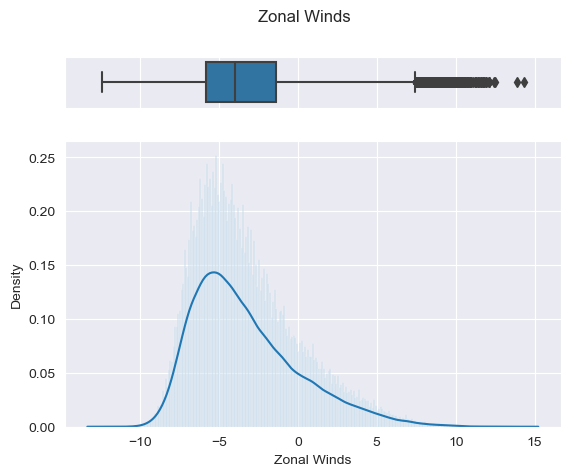

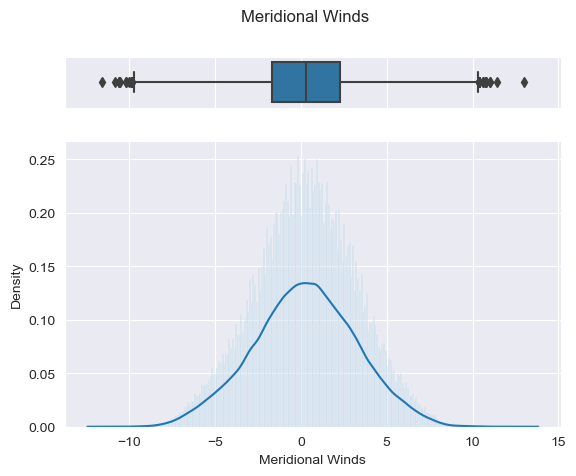

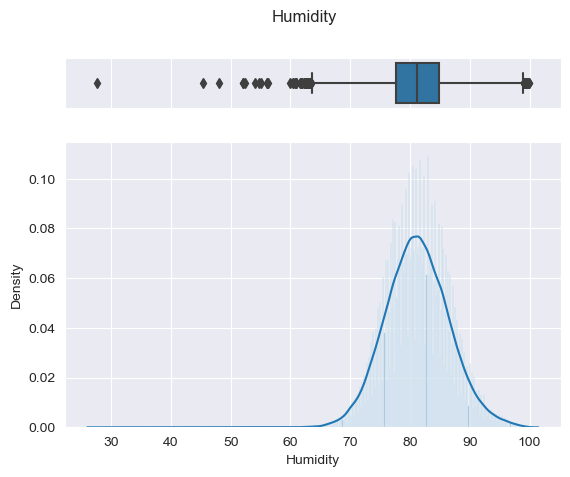

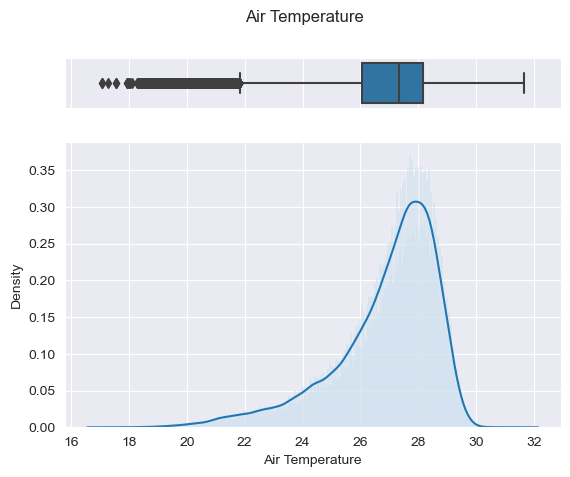

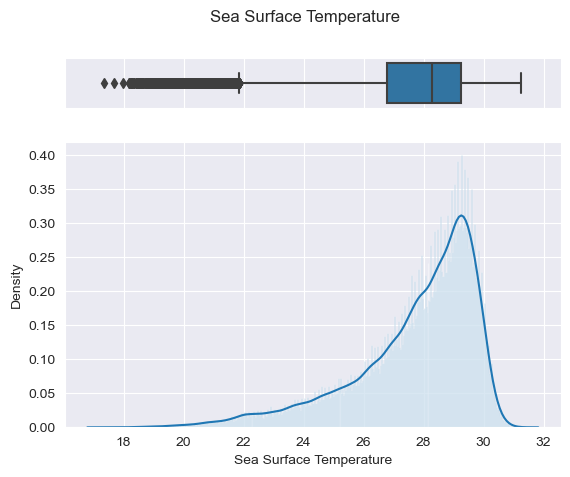

In [43]:
sns.set_style('darkgrid')
obs_var = ['zonal_winds', 'meridional_winds', 'humidity', 'air_temperature', 'sea_surface_temperature']
obs_names = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temperature', 'Sea Surface Temperature']
for i in range(len(obs_var)):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
    f.suptitle(obs_names[i])
    sns.boxplot(x=enso[obs_var[i]], ax=ax_box, whis=2)
    ax_box.set(xlabel=None)
    sns.distplot(enso[obs_var[i]], ax=ax_hist, bins=int(np.sqrt(len(enso))))
    ax_hist.set(xlabel=obs_names[i])
    plt.show()

In [44]:
enso[obs_var].describe().T

,count,mean,std,min,25%,50%,75%,max
zonal_winds,152938.0,-3.304934,3.373344,-12.40,-5.80,-4.00,-1.40,14.30
meridional_winds,152939.0,0.249557,2.999102,-11.60,-1.70,0.30,2.30,13.00
humidity,112340.0,81.236746,5.315452,27.58,77.70,81.20,84.80,99.90
air_temperature,159870.0,26.887762,1.816363,17.05,26.06,27.34,28.18,31.66
sea_surface_temperature,161100.0,27.715516,2.057336,17.35,26.77,28.29,29.23,31.26


**Observations**
* The average SST is 27.72° C and its range is 13.91° C.
* The outliers in SST are to the left of the distribution, meaning that usually the temperature is warm on the region.
* All our variables present outliers in their distribution; this means that there are anomalies in the observations, as expected.
* Zonal Winds, Air Temperature and SST have skewed distributions. 
* Meridional Winds is fairly symmetrical.
* The scales vary and need to be scaled when using distance-based ML models.
* The means of Air temperature and SST, as well as their standard deviation and median are similar; this suggests that they are closely related to each other. 

#### Bivariate analysis and multivariate analysis

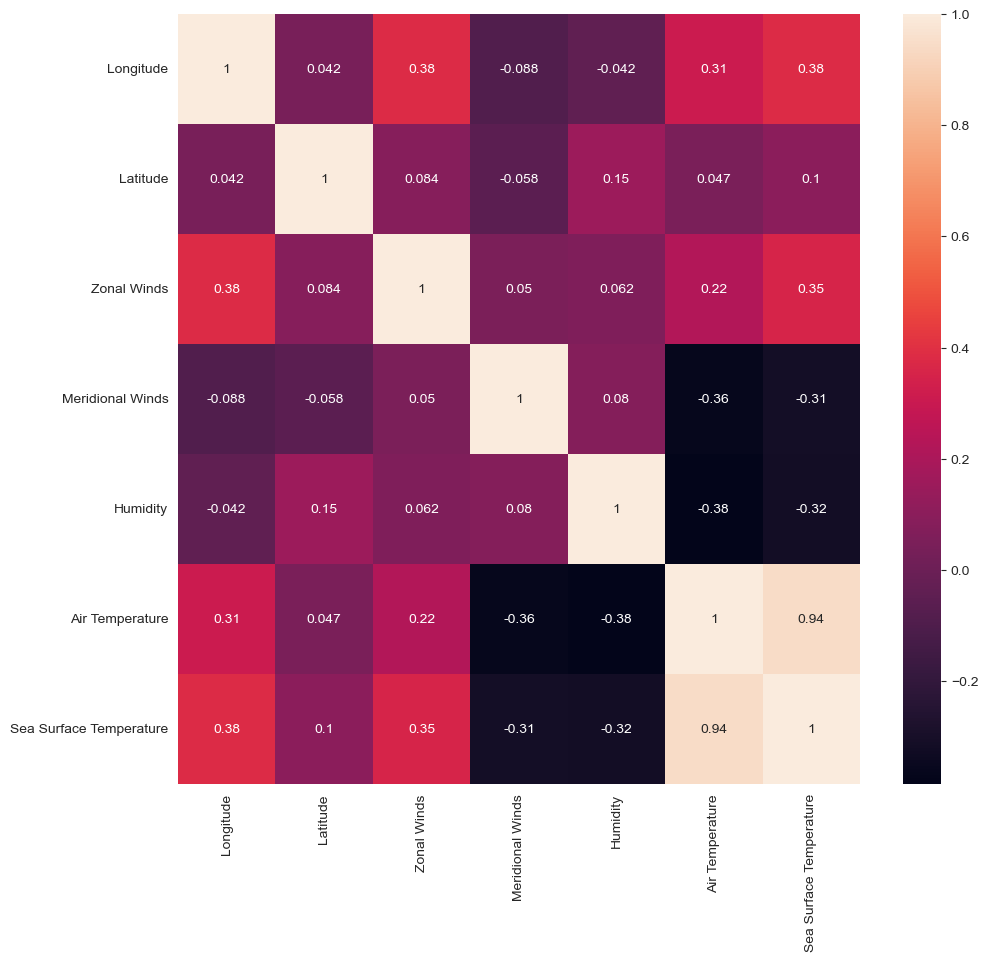

In [45]:
obs_var_mul = ['longitude', 'latitude', 'zonal_winds', 'meridional_winds', 'humidity', 'air_temperature', 'sea_surface_temperature']
obs_names_mul = ['Longitude', 'Latitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temperature', 'Sea Surface Temperature']
plt.figure(figsize = (11,10))
sns.heatmap(enso[obs_var_mul].corr(), annot = True, xticklabels=obs_names_mul, yticklabels=obs_names_mul)
plt.show()

**Observation**
* As suggested above, the Air Temperature and SST are strongly correlated between each other.
* The relationship among other variables is weak, at best. 

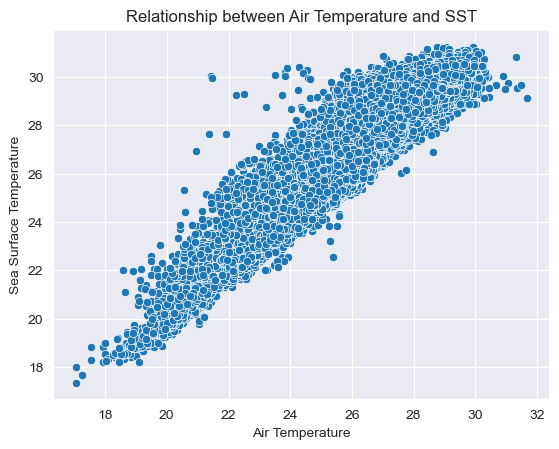

In [46]:
g = sns.scatterplot(x='air_temperature', y='sea_surface_temperature', data=enso)
plt.title('Relationship between Air Temperature and SST')
plt.xlabel('Air Temperature')
plt.ylabel('Sea Surface Temperature')
plt.show()

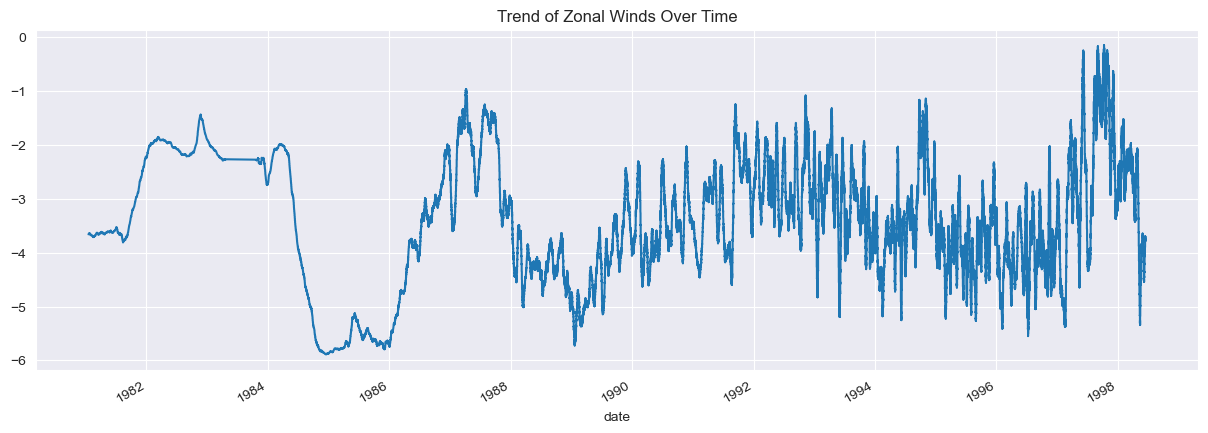

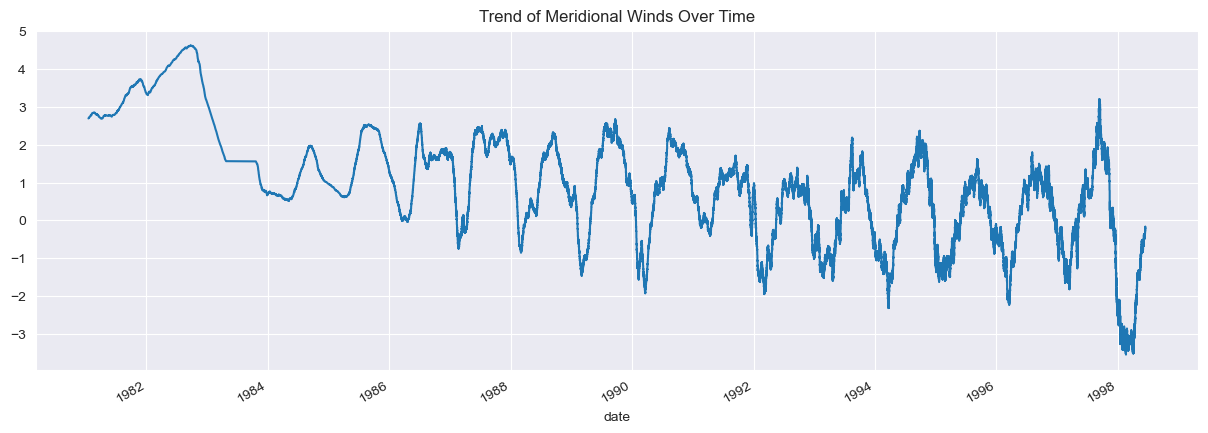

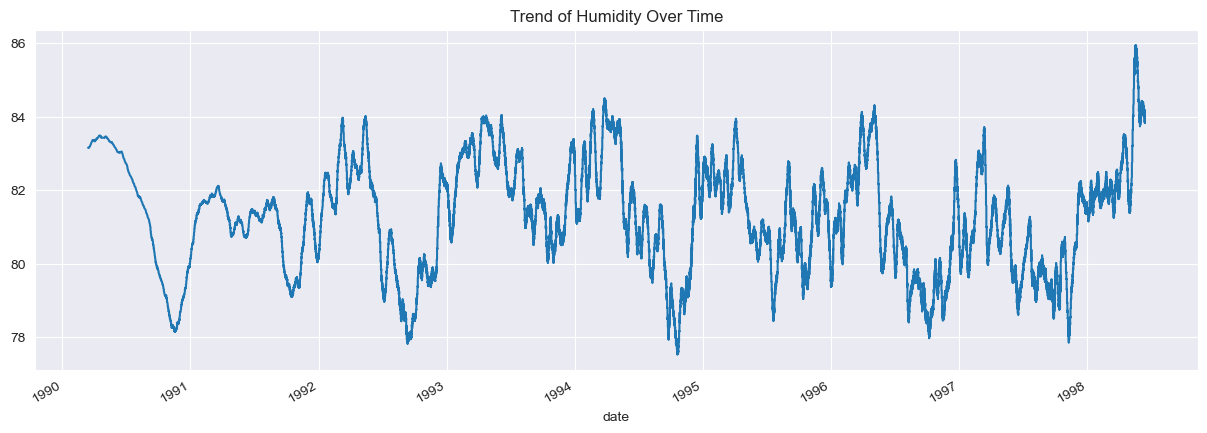

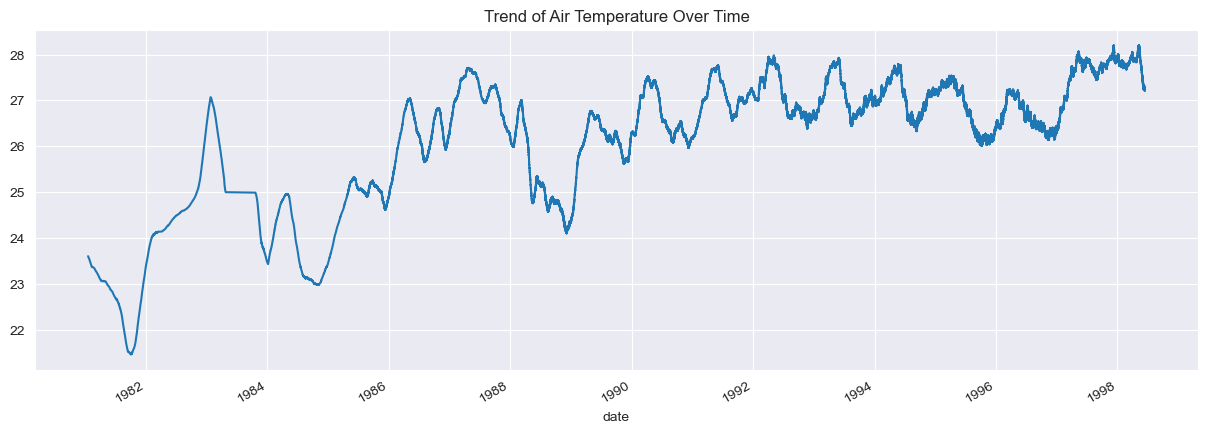

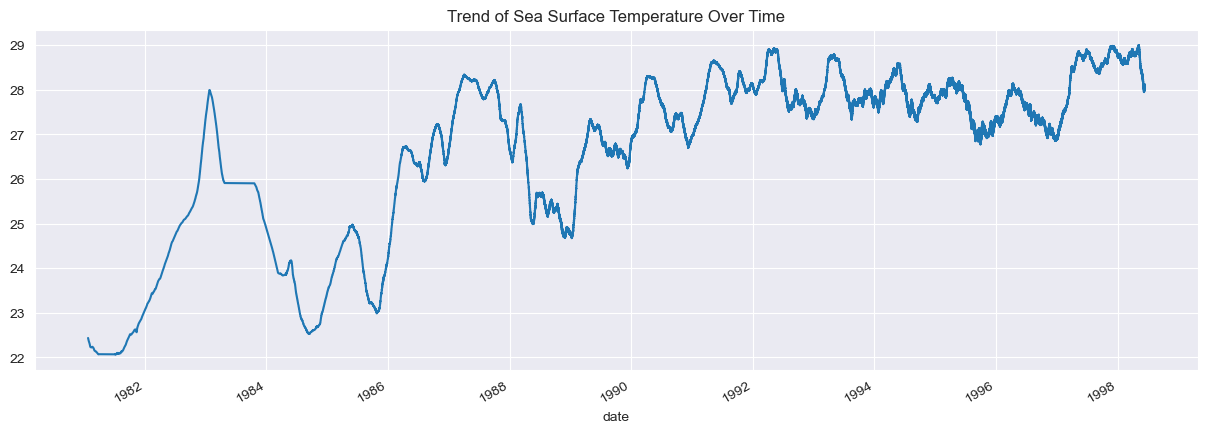

In [47]:
# Plotting trends of variables 
from statsmodels.tsa.seasonal import seasonal_decompose
for i in range(len(obs_var)):
    decomposition = seasonal_decompose(enso[obs_var[i]].dropna(), period = 365)
    plt.figure(figsize=(15,5))
    decomposition.trend.plot()
    plt.title('Trend of '+obs_names[i]+' Over Time')
    plt.show()

**Observations**
* Air Temperature and SST, according to their trend, have increased over time. This is consistent with global warming.
* The other variables do not present a discernable trend over time; they fluctuate over time.This is consistent with the periodic fluctuation of ENSO.

### Data Preprocessing

#### Imputing missing values

* To impute missing values we will use `SimpleImputer` using the meadian for missing values.

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [49]:
# Creating transformation pipeline
trans_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median'))
]
)

### Model

To look for anomalies in the observations, we will use the IForest algorithm and the MAD algorithm; the latter will be used in each variable. IForest is a tree based algorithm and MAD is used on a single variable at a time, for this reason, we did not scale the features.

In [50]:
from pyod.models.iforest import IForest

In [51]:
# Creating IForest pipeline
iforest = IForest()
if_pipeline = Pipeline(steps=[
    ('trans_pipeline', trans_pipeline),
    ('iforest', iforest)
])

In [52]:
if_pipeline.fit(enso)

Pipeline(steps=[('trans_pipeline',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(strategy='median'))])),
                ('iforest',
                 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0))])

In [53]:
# Getting the labels for anomalies and counting them
labels = if_pipeline.steps[1][1].labels_
len(enso[labels==1])

17812

**Observation:**
* The IForest algorithm detects 17812 anomalies in our data set.

In [54]:
# Printing labels
print(labels)

[0 0 0 ... 1 0 0]


In [55]:
# Getting probabilities for each class 
probs = if_pipeline.predict_proba(enso)
print(probs)

[[0.58256861 0.41743139]
 [0.62032774 0.37967226]
 [0.61931897 0.38068103]
 ...
 [0.35060022 0.64939978]
 [0.53036273 0.46963727]
 [0.56556563 0.43443437]]


From these results we noticed that the model is not that confident in predicting outlier labels; for example, the second to last observation is labeled as inlier even though the probability of it being outlier is slightly greater. For this reason, let's modify the threshold to label observations as outliers.

In [56]:
is_outlier = probs[:,1] > 0.65
is_inlier = probs[:,1] <= 0.65
len(enso[is_outlier])

2894

With this modification, the number of outliers is greatly reduced. Let's use MAD to look for anomalies in each feature. 

In [57]:
from pyod.models.mad import MAD

In [58]:
mad = MAD()
mad_pipeline = Pipeline(steps=[
    ('trans_pipeline', trans_pipeline),
    ('MAD', mad)
])
display(mad_pipeline)

Pipeline(steps=[('trans_pipeline',
                 Pipeline(steps=[('impute',
                                  SimpleImputer(strategy='median'))])),
                ('MAD', MAD(threshold=3.5))])

In [59]:
for i in range(len(obs_var)):
    # Reshaping data
    results = enso[obs_var[i]].values.reshape(-1,1)
    # fit Mad
    mad_pipeline.fit(results)
    # Find outliers
    labels = mad_pipeline.steps[1][1].labels_
    is_outlier = labels == 1
    outliers = enso[is_outlier]
    # Number of outliers
    print('The number of outliers for '+obs_names[i]+' is:', len(outliers))

The number of outliers for Zonal Winds is: 3810
The number of outliers for Meridional Winds is: 414
The number of outliers for Humidity is: 18993
The number of outliers for Air Temperature is: 7013
The number of outliers for Sea Surface Temperature is: 7149


In [60]:
for i in range(len(obs_var)):
    # Imputing NaN
    median = enso[obs_var[i]].median()
    results = enso[obs_var[i]].fillna(median)
    results = seasonal_decompose(results, period=365)
    # Getting the residuals
    residuals = results.resid
    residuals = residuals.values.reshape(-1, 1)
    # fit Mad
    mad.fit(residuals)
    # Find outliers
    labels = mad.labels_
    is_outlier = labels == 1
    outliers = enso[is_outlier]
    # Number of outliers
    print('The number of outliers for '+obs_names[i]+' is:', len(outliers))

The number of outliers for Zonal Winds is: 2781
The number of outliers for Meridional Winds is: 246
The number of outliers for Humidity is: 11893
The number of outliers for Air Temperature is: 3849
The number of outliers for Sea Surface Temperature is: 3841


**Observations**:
* By decomposing the features, the number of anomalies in the dataset is greatly reduced for some of them. 

**Final observations of the dataset**

As interesting as the dataset is, we can't really predict future anomalies on ENSO for the following reasons:
* The ONI value is the standard metric used to determine if the conditions for EL Niño and La Niña to happen are met, since we don't have this  value in this dataset we can't determine if these conditions are met.
* Since we don't have the labels needed, the only type of models we can use for this dataset are unsupervised; as shown above, we can in fact detect anomalies but, once again, we can't declare if El Niño or La Niña will happen.
* We can't calculate the ONI values from this dataset without introducing heavy bias into the calculations; this comes from the fact that this dataset has missing months of observations and hence we can't properly calculate those values.

This does not mean the exploration of this dataset was in vain; we have learned that SST and Air temperature are strongly correlated and that SST is not correlated, at least significantly, with any other of the features given in this dataset.

For the reasons stated above, we will look at another dataset that will allow us to forecast ONI values. 

## ENSO Second Dataset

The first dataset we are going to analyse comes from Kaagle and can be found in the following [link](https://www.kaggle.com/datasets/shabanamir/enso-data).

**Data Dictionary:**
* **Date** 
* **Year** 
* **Global Temperature Anomalies**
* **Niño 1+2 SST** - Sea surface temperature in Niño 1+2 region.
* **Niño 1+2 SST Anomalies** - Sea surface temperature anaomalies in Niño 1+2 region.
* **Niño 3 SST** - Sea surface temperature in Niño 3 region.
* **Niño 3 SST Anomalies** - Sea surface temperature anaomalies in Niño 3 region.
* **Niño 3.4 SST** - Sea surface temperature in Niño 3.4 region.
* **Niño 3.4 SST Anomalies** - Sea surface temperature anaomalies in Niño 3.4 region.
* **Niño 4 SST** - Sea surface temperature in Niño 4 region.
* **Niño 4 SST Anomalies** - Sea surface temperature anaomalies in Niño 4 region.
* **Niño 3 SST** - Sea surface temperature in Niño 3 region.
* **TNI** - Trans-Niño Index
* **PNA** - Pacific North America Pattern
* **OLR** - Outgoing Longwave Radiation
* **SOI** - Southern Oscillation Index
* **Season (2-Month)**
* **MEI.v2** - The bi-monthly Multivariate El Niño/Southern Oscillation index
* **Season (3-Month)**
* **ONI** - Oceanic niño index
* **Season (12-Month)**
* **ENSO Phase-Intensity** - Intensity of El Niño/La Niña event
    * WE - weak El Niño
    * ME - moderate El Niño
    * SE - strong El Niño
    * VSE - very strong El Niño
    * WL - weak La Niña
    * ML - moderate La Niña
    * SL - strong La Niña
    
Let's define the new metrics introduced in this dataset:
* **TNI:** The TNI is defined to be the difference in normalized SST anomalies between the Niño 1+2 and Niño 4 regions.  The TNI thus measures the gradient in SST anomalies between the central and eastern equatorial Pacific.
* **PNA:** The pattern of air pressure anomalies departures from the long-term average at four locations over the Pacific Ocean and North America correlate with regional temperature and precipitation anomalies across North America.
* **OLR:** Is a measure of the amount of energy emitted to space by earth's surface, oceans and atmosphere
* **SOI:** Standardized index based on the observed sea level pressure (SLP) differences between Tahiti and Darwin, Australia.
* **MEI.v2:** The time series of the leading combined Empirical Orthogonal Function of five different variables sea level pressure, sea surface temperature, zonal and meridional components of the surface wind, and outgoing longwave radiation over the tropical Pacific basin.

### Data Validation

In [61]:
enso_oni = pd.read_csv('../data/ENSO.csv')

In [62]:
enso_oni.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1/1/1950,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,2/1/1950,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,3/1/1950,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,4/1/1950,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,5/1/1950,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [63]:
enso_oni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          882 non-null    object 
 1   Year                          882 non-null    int64  
 2   Month                         882 non-null    object 
 3   Global Temperature Anomalies  882 non-null    float64
 4   Nino 1+2 SST                  498 non-null    float64
 5   Nino 1+2 SST Anomalies        498 non-null    float64
 6   Nino 3 SST                    498 non-null    float64
 7   Nino 3 SST Anomalies          498 non-null    float64
 8   Nino 3.4 SST                  498 non-null    float64
 9   Nino 3.4 SST Anomalies        498 non-null    float64
 10  Nino 4 SST                    498 non-null    float64
 11  Nino 4 SST Anomalies          498 non-null    float64
 12  TNI                           875 non-null    float64
 13  PNA  

In [64]:
# Percentahe of missing values in each column
enso_oni.isna().sum() / len(enso_oni) * 100

Date                             0.000000
Year                             0.000000
Month                            0.000000
Global Temperature Anomalies     0.000000
Nino 1+2 SST                    43.537415
Nino 1+2 SST Anomalies          43.537415
Nino 3 SST                      43.537415
Nino 3 SST Anomalies            43.537415
Nino 3.4 SST                    43.537415
Nino 3.4 SST Anomalies          43.537415
Nino 4 SST                      43.537415
Nino 4 SST Anomalies            43.537415
TNI                              0.793651
PNA                              0.000000
OLR                             34.920635
SOI                              1.360544
Season (2-Month)                 0.000000
MEI.v2                          39.455782
Season (3-Month)                 0.000000
ONI                              0.000000
Season (12-Month)                0.000000
ENSO Phase-Intensity             0.680272
dtype: float64

* **Observations:**
* We notice that several columns have a large percentage of missing values; these missing values appear at the beginning of the table, which means it is not advisable to input them with some time series method like *forward filling* or *backward filling*. 
    * The ONI values, which we will use to make our predictions, are directly related to the sea surface temperature in the Niño 3.4 region; we can safely drop all the SST columns since the information we need is already encoded in another column. 
    * The OLR and MEI.v2 columns have a large percentage of missing values. To avoid bias while inputting these columns, we will drop them as well. 
    * Year, Month and the Season columns are labels from the date, which means we can safely drop them.
    * ENSO Phase-Intensity is defined from the ONI values. For that reason, we will drop these columns as well.

In [65]:
col_to_drop = ['Year', 'Month', 'Nino 1+2 SST', 'Nino 1+2 SST Anomalies', 'Nino 3 SST', 'Nino 3 SST Anomalies', 'Nino 3.4 SST', 'Nino 3.4 SST Anomalies', 'Nino 4 SST',
              'Nino 4 SST Anomalies', 'OLR', 'Season (2-Month)', 'MEI.v2', 'Season (3-Month)', 'Season (12-Month)', 'ENSO Phase-Intensity']
enso_oni.drop(labels=col_to_drop, inplace=True, axis=1)

In [66]:
enso_oni.rename(columns = {'Date':'date', 'Global Temperature Anomalies':'gbt', 'TNI':'tni', 'PNA':'pna', 'SOI':'soi', 'ONI':'oni'}, inplace = True)

In [67]:
enso_oni['date'] = pd.to_datetime(enso_oni['date'])
enso_oni.sort_values(by='date')

,date,gbt,tni,pna,soi,oni
0,1950-01-01,-0.20,0.624,-3.65,NaN,-1.5
1,1950-02-01,-0.26,0.445,-1.69,NaN,-1.3
2,1950-03-01,-0.08,0.382,-0.06,NaN,-1.2
3,1950-04-01,-0.16,0.311,-0.23,NaN,-1.2
4,1950-05-01,-0.02,0.124,-0.40,NaN,-1.1
...,...,...,...,...,...,...
877,2023-02-01,1.00,NaN,-1.15,1.4,-0.4
878,2023-03-01,1.23,NaN,-1.89,0.2,-0.1
879,2023-04-01,0.98,NaN,-0.65,0.2,0.2
880,2023-05-01,0.96,NaN,-0.67,-1.0,0.5


In [68]:
# Filling NaN
enso_oni.fillna(value={'tni': enso_oni['tni'].median(), 'soi': enso_oni['soi'].median()}, inplace = True)

In [69]:
enso_oni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    882 non-null    datetime64[ns]
 1   gbt     882 non-null    float64       
 2   tni     882 non-null    float64       
 3   pna     882 non-null    float64       
 4   soi     882 non-null    float64       
 5   oni     882 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 41.5 KB


In [70]:
# Searching for duplicated rows
print(enso_oni.duplicated().any())

False


### EDA

In [71]:
# Setting the date column as index
enso_oni = enso_oni.set_index('date')
enso_oni.head()

,gbt,tni,pna,soi,oni
date,,,,,
1950-01-01,-0.20,0.624,-3.65,0.2,-1.5
1950-02-01,-0.26,0.445,-1.69,0.2,-1.3
1950-03-01,-0.08,0.382,-0.06,0.2,-1.2
1950-04-01,-0.16,0.311,-0.23,0.2,-1.2
1950-05-01,-0.02,0.124,-0.40,0.2,-1.1


#### Univariate analysis of numerical variables

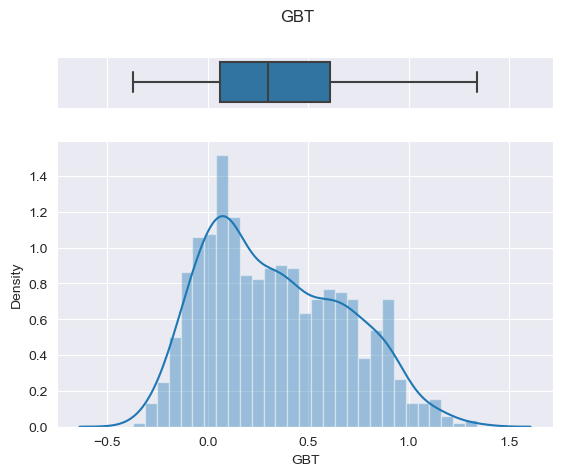

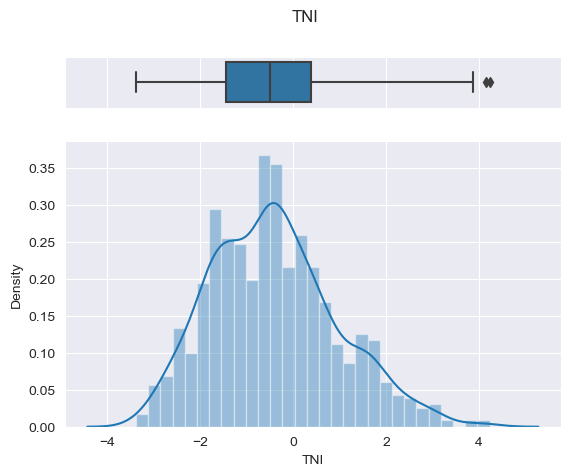

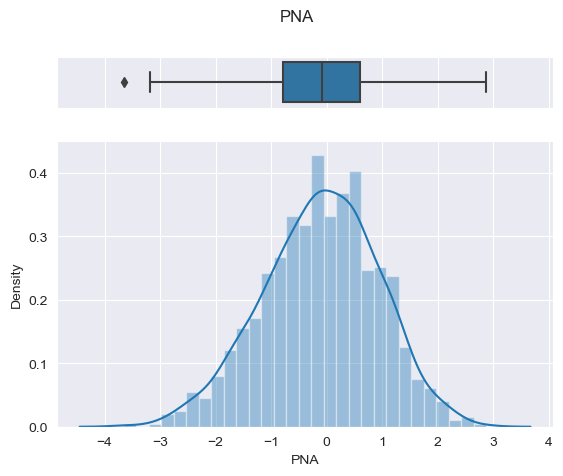

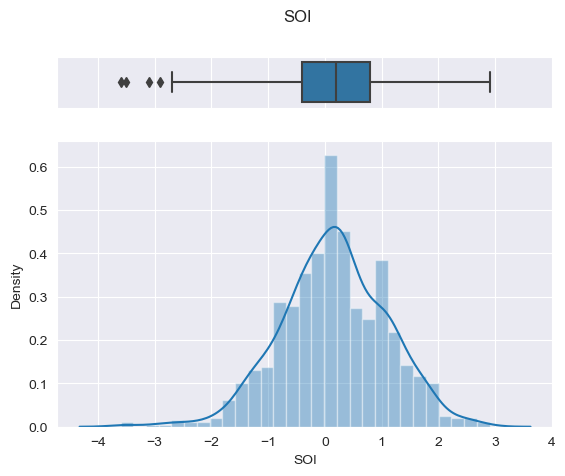

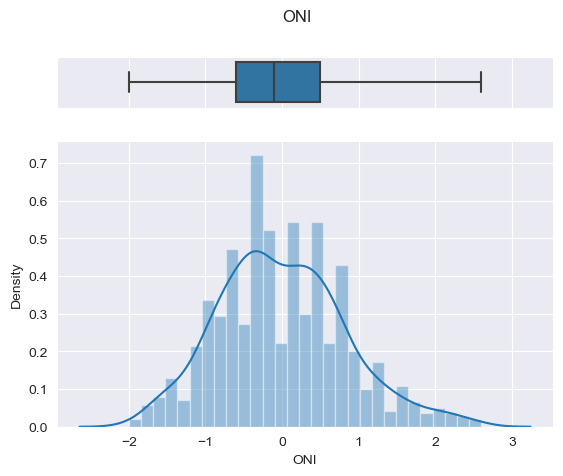

In [72]:
obs_var = ['gbt', 'tni', 'pna', 'soi', 'oni']
obs_names = [i.upper() for i in obs_var]
for i in range(len(obs_var)):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
    f.suptitle(obs_names[i])
    sns.boxplot(x=enso_oni[obs_var[i]], ax=ax_box, whis=2)
    ax_box.set(xlabel=None)
    sns.distplot(enso_oni[obs_var[i]], ax=ax_hist, bins=int(np.sqrt(len(enso_oni))))
    ax_hist.set(xlabel=obs_names[i])
    plt.show()

In [73]:
enso_oni.describe().T

,count,mean,std,min,25%,50%,75%,max
gbt,882.0,0.337971,0.345478,-0.370,0.0600,0.300,0.610,1.340
tni,882.0,-0.419139,1.355970,-3.376,-1.4470,-0.497,0.377,4.227
pna,882.0,-0.109002,1.034818,-3.650,-0.7875,-0.080,0.600,2.870
soi,882.0,0.154762,0.934109,-3.600,-0.4000,0.200,0.800,2.900
oni,882.0,-0.003175,0.832301,-2.000,-0.6000,-0.100,0.500,2.600


**Observations.**
* GBT and ONI do not present outliers on their distributions.
* TNI, PNA, SOI and ONI distributions, while not symmetrical, are not particularly skewed.
* GBT is skewed to the right, which may mean that we are getting warmer anomalies.

#### Bivariate analysys and multivariate analysis

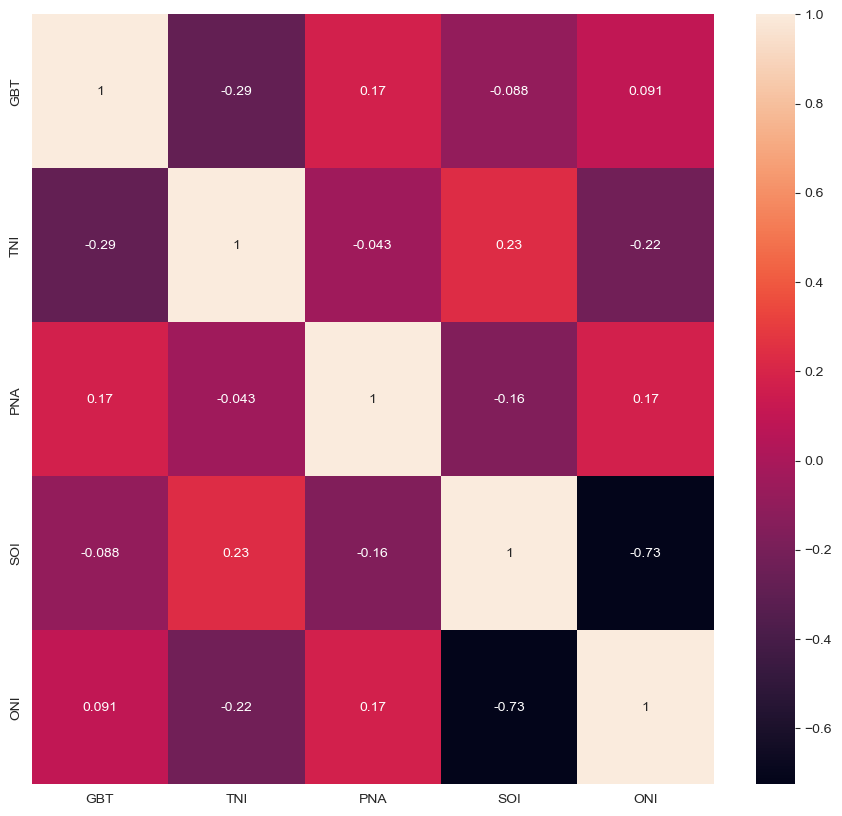

In [74]:
plt.figure(figsize = (11,10))
sns.heatmap(enso_oni.corr(), annot = True, xticklabels=obs_names, yticklabels=obs_names)
plt.show()

**Observations:**
* ONI and SOI have a strong negative correlation between them.
* Suprinsingly, ONI and GBT have no correlation between them.
* While very weakly correlated, which is expected since PNA is an independent mode of climate variability, ONI and PNA do appear to influence each other to some extent. From their correlation coefficient we can conclude that PNA positive phases will be associated with El Niño conditions while negative phases will be associated with La Niña conditions.
* TNI and ONI are very weakly correlated.

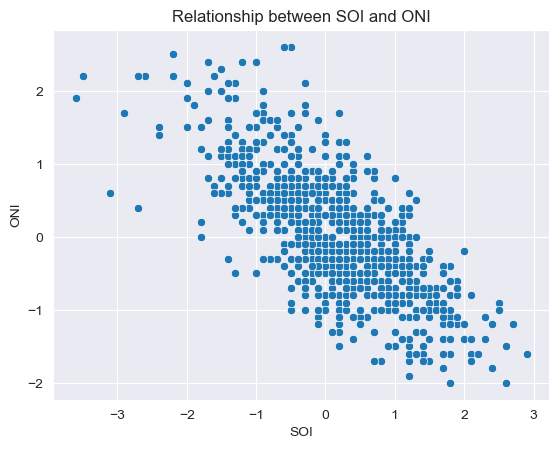

In [75]:
# Showing relationship between SOI and ONI
g1 = sns.scatterplot(x='soi', y='oni', data=enso_oni)
plt.title('Relationship between SOI and ONI')
plt.xlabel('SOI')
plt.ylabel('ONI')
plt.show()

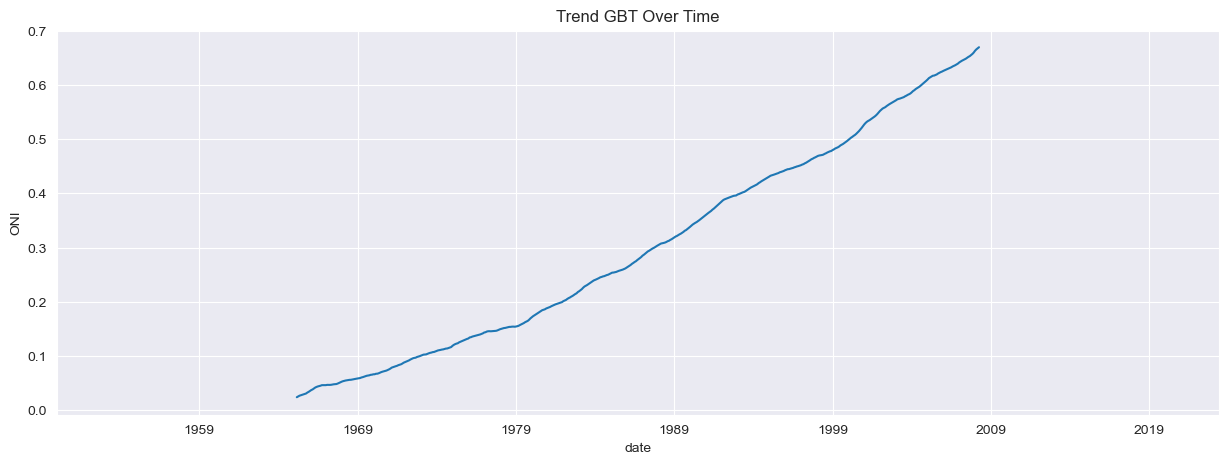

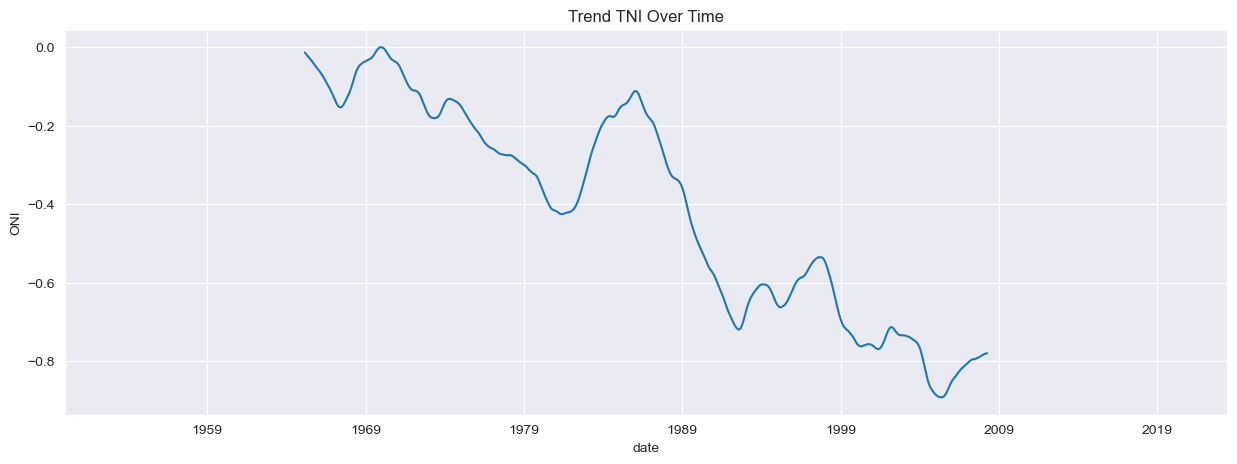

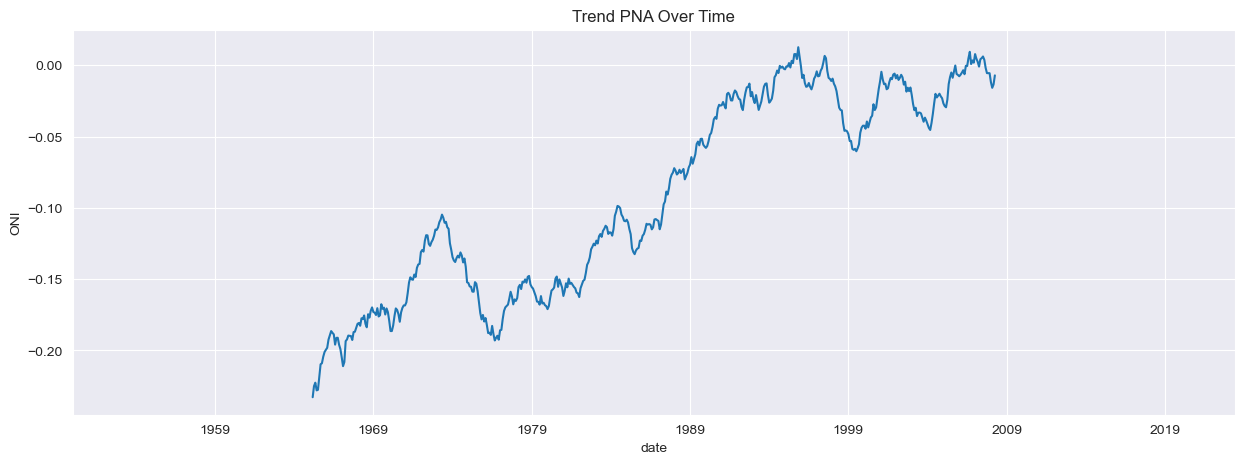

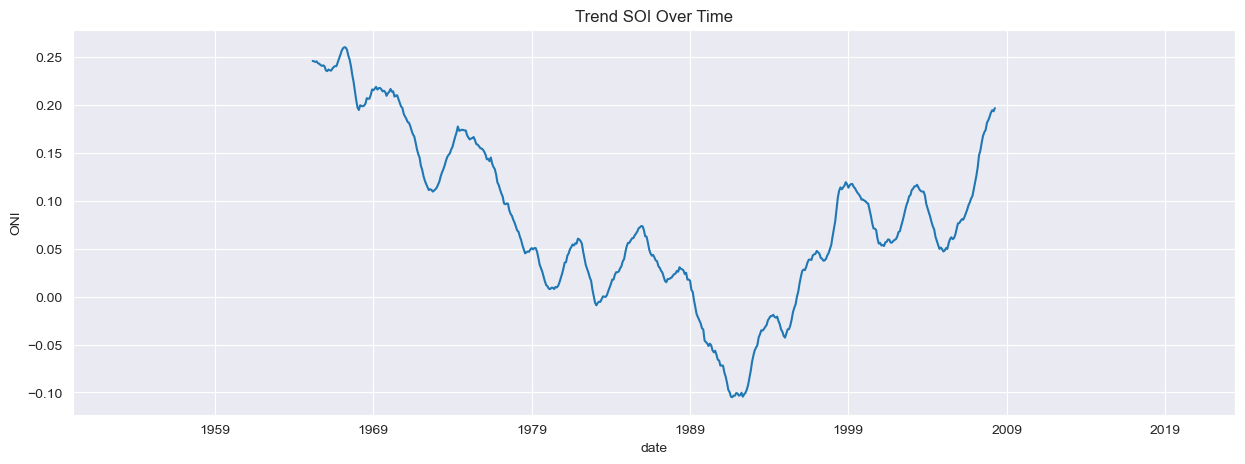

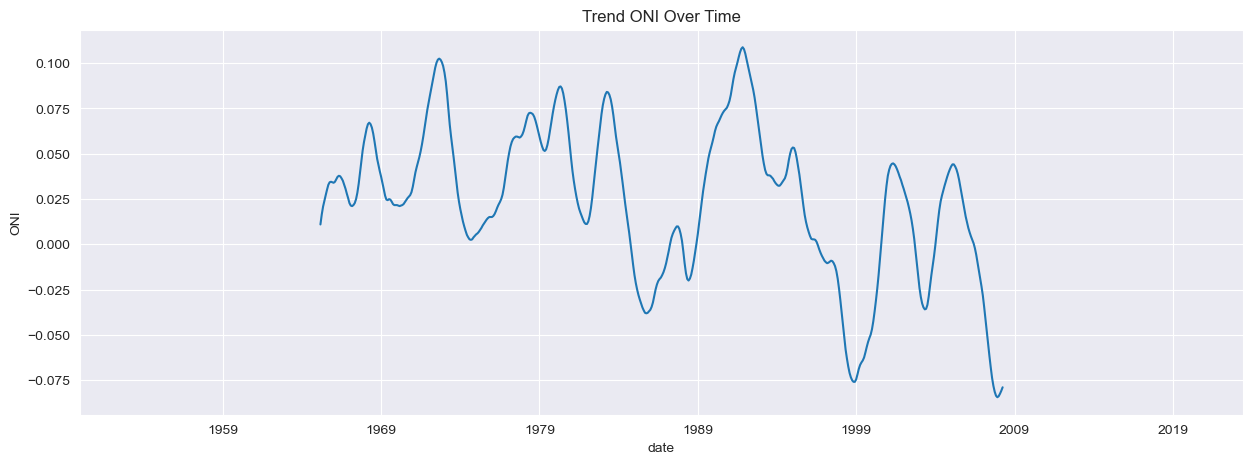

In [76]:
# Getting trends over time
for i in range(len(obs_var)):
    plt.figure(figsize=(15,5))
    decomposition = seasonal_decompose(enso_oni[obs_var[i]].dropna(), period = 365)
    decomposition.trend.plot()
    plt.title('Trend '+obs_names[i]+' Over Time')
    plt.ylabel('ONI')
    plt.show()

**Observations.**
* GBT has increased over time, which is an indication of global warming.
* TNI has decreased over time.
* PNA has increased over time.
* Overall, ONI appears to have decreased over time but we notice that it fluctuates from positive anomalies to negative anomalies and vice versa, which is an indication of the periodic nature of ENSO.

### Data Preprocessing

In [77]:
# Converting the series to monthly frequency
enso_oni = enso_oni.asfreq('MS')

In [78]:
# Splitting the data using 20% as test data
steps = int(len(enso_oni) * 0.2)
train = enso_oni[:-steps]
test = enso_oni[-steps:]

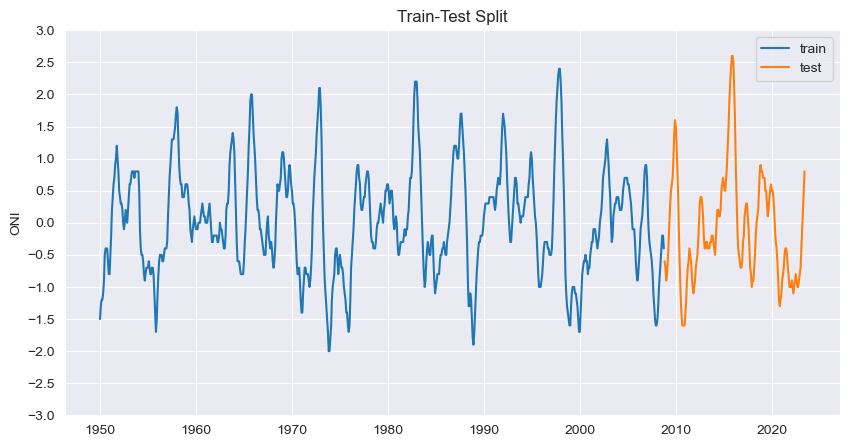

In [79]:
# Plotting train and test sets
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train['oni'].index, train['oni'], label='train')
ax.plot(test['oni'].index, test['oni'], label='test')
ax.legend()
plt.ylabel('ONI')
ax.set_yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]) 
plt.title('Train-Test Split')
plt.show()

### Models

To forecast ONI values we will try Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, Random Forest and Gradient Boost. Since the scales are fairly similar across all features, we won't scale the data for these models.  

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [81]:
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dec_tree = DecisionTreeRegressor(random_state=45)
ran_forest = RandomForestRegressor(random_state=45)
gra_boost = GradientBoostingRegressor(random_state=45)

In [82]:
# Models with only time as predictor.
models = [lin_reg, ridge, lasso, dec_tree, ran_forest, gra_boost]
models_names = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boost']
for i in range(len(models)):
    forecaster = ForecasterAutoreg(
        regressor = models[i],
        lags = 25
    )
    forecaster.fit(y=train['oni'])
    y_pred = forecaster.predict(steps)
    # fig, ax = plt.subplots(figsize=(15, 10))
    # train['oni'].plot(ax=ax, label='train')
    # test['oni'].plot(ax=ax, label='test')
    # y_pred.plot(ax=ax, label='predictions')
    # ax.legend()
    # plt.title(models_names[i])
    mse = mean_squared_error(test['oni'], y_pred, squared=False)
    print('The Root Mean squared error for '+models_names[i]+' model is: ', mse)

The Root Mean squared error for Linear Regression model is:  0.8531034206272821
The Root Mean squared error for Ridge model is:  0.8524287503501682
The Root Mean squared error for Lasso model is:  0.863628303265557
The Root Mean squared error for Decision Tree model is:  0.9176922637295636
The Root Mean squared error for Random Forest model is:  0.8449051520194978
The Root Mean squared error for Gradient Boost model is:  0.8739010210273326


In [83]:
# Models using remaining variables as exogenous features.
models = [lin_reg, ridge, lasso, dec_tree, ran_forest, gra_boost]
models_names = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boost']
for i in range(len(models)):
    forecaster = ForecasterAutoreg(
        regressor = models[i],
        lags = 25
    )
    forecaster.fit(y=train['oni'], exog=train[['gbt', 'tni', 'pna', 'soi']])
    y_pred = forecaster.predict(steps, exog=test[['gbt', 'tni', 'pna', 'soi']])
    # fig, ax = plt.subplots(figsize=(15, 10))
    # train['oni'].plot(ax=ax, label='train')
    # test['oni'].plot(ax=ax, label='test')
    # y_pred.plot(ax=ax, label='predictions')
    # ax.legend()
    # plt.title(models_names[i])
    mse = mean_squared_error(test['oni'], y_pred, squared=False)
    print('The Root Mean squared error for '+models_names[i]+' model is: ', mse)

The Root Mean squared error for Linear Regression model is:  0.6265450139013699
The Root Mean squared error for Ridge model is:  0.6210749931917506
The Root Mean squared error for Lasso model is:  0.863628303265557
The Root Mean squared error for Decision Tree model is:  0.9217695432748312
The Root Mean squared error for Random Forest model is:  0.7794085753138257
The Root Mean squared error for Gradient Boost model is:  0.7781108128322465


**Observation.**
* Ridge Regression has the best metric of all the models so far, followed by Linear Regression, Gradient Boosting and Random forest. Let's hypertune these models to check if we can improve their prediction power.

#### Hyperparameter tuning

In [84]:
from skforecast.model_selection import grid_search_forecaster

##### Ridge Reression

In [85]:
# GridSearch for Ridge regression
forecaster = ForecasterAutoreg(
    regressor = ridge,
    lags = 25
)

lags_grid = list(range(1,100,5))
param_grid = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
results_grid = grid_search_forecaster(
    forecaster = forecaster,
    y = train['oni'],
    exog = train[['gbt', 'tni', 'pna', 'soi']],
    param_grid = param_grid,
    lags_grid = lags_grid,
    steps = steps,
    metric = 'mean_squared_error',
    initial_train_size = int(len(train)*0.8),
    verbose = False,
    return_best = True
)

Number of models compared: 320.


lags grid:   0%|          | 0/20 [00:00<?, ?it/s]

params grid:   0%|          | 0/16 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26] 
  Parameters: {'alpha': 5}
  Backtesting metric: 0.4015828081548008



In [86]:
# Making predictions and evaluating model on test set
y_pred = forecaster.predict(steps, exog=test[['gbt', 'tni', 'pna', 'soi']])
mse = mean_squared_error(test['oni'], y_pred, squared=False)
print('The root mean squared error is:', mse)

The root mean squared error is: 0.6072410110957913


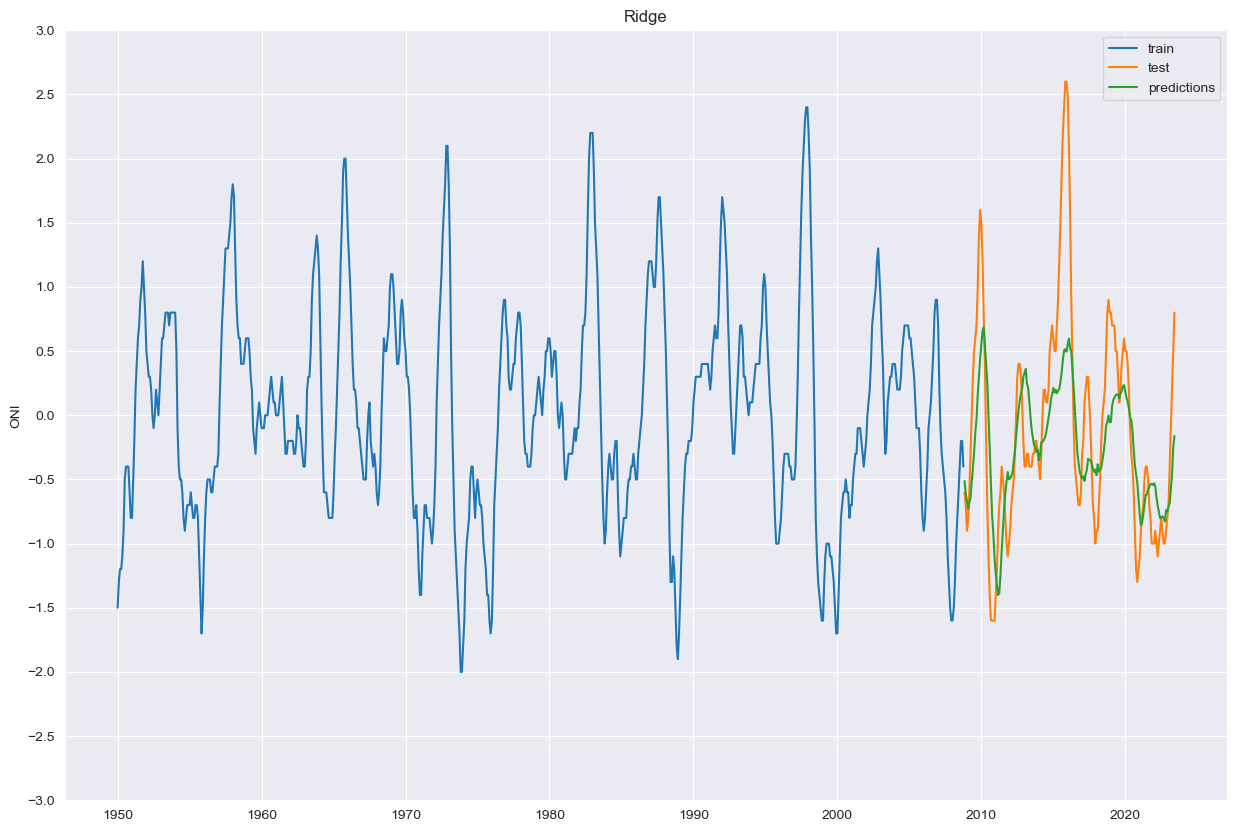

In [87]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train['oni'].index, train['oni'], label='train')
ax.plot(test['oni'].index, test['oni'], label='test')
ax.plot(test['oni'].index, y_pred, label='predictions')
ax.legend()
plt.ylabel('ONI')
ax.set_yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]) 
plt.title('Ridge')
plt.show()

In [88]:
# import sys
# sys.path.append('../utils')
# from my_utils import plot_feature_importance
# ridge_importance = forecaster.get_feature_importances()
# plot_feature_importance(ridge_importance.iloc[:,1], ridge_importance.iloc[:,0], 'Ridge')

##### Random Forest

In [89]:
# GridSearch for Random Forest 
forecaster = ForecasterAutoreg(
    regressor = ran_forest,
    lags = 5
)

lags_grid = [30, 35]
param_grid = {'n_estimators': [200, 210],
              'max_depth' : [10, 15, 20]
             }
results_grid = grid_search_forecaster(
    forecaster = forecaster,
    y = train['oni'],
    exog = train[['gbt', 'tni', 'pna', 'soi']],
    param_grid = param_grid,
    lags_grid = lags_grid,
    steps = steps,
    metric = 'mean_squared_error',
    initial_train_size = int(len(train)*0.8),
    verbose = False,
    return_best = True
)

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
  Parameters: {'max_depth': 10, 'n_estimators': 200}
  Backtesting metric: 0.6477477690050226



In [90]:
y_pred = forecaster.predict(steps, exog=test[['gbt', 'tni', 'pna', 'soi']])
mse = mean_squared_error(test['oni'], y_pred, squared=False)
print('The best root mean squared error is:', mse)

The best root mean squared error is: 0.7190721118792798


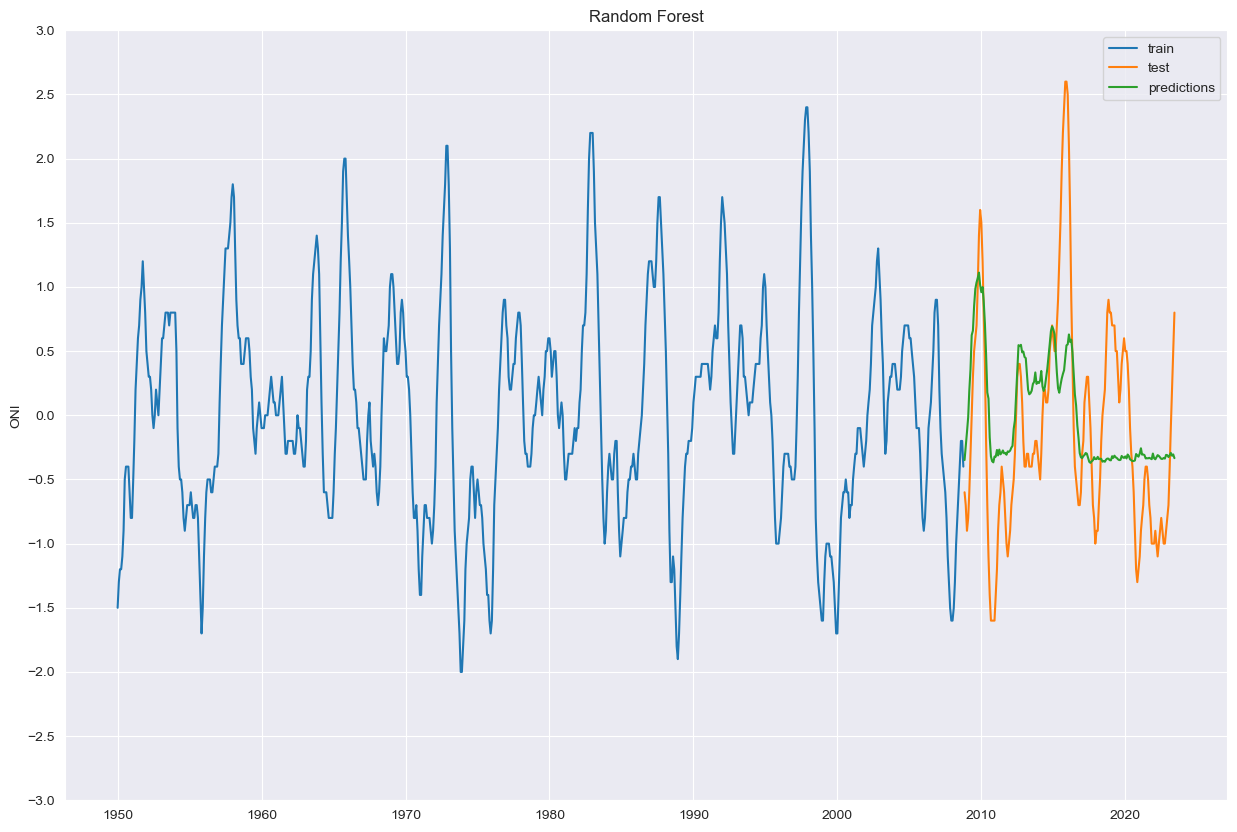

In [91]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train['oni'].index, train['oni'], label='train')
ax.plot(test['oni'].index, test['oni'], label='test')
ax.plot(test['oni'].index, y_pred, label='predictions')
ax.legend()
plt.ylabel('ONI')
ax.set_yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]) 
plt.title('Random Forest')
plt.show()

In [92]:
# ran_forest_importance = forecaster.get_feature_importances()
# plot_feature_importance(ran_forest_importance.iloc[:,1], ran_forest_importance.iloc[:,0], 'Ridge')

##### Gradient Boosting

In [93]:
# GridSearch for Gradient Boosting 
forecaster = ForecasterAutoreg(
    regressor = gra_boost,
    lags = 5
)

lags_grid = list(range(10,21,1))
param_grid = {'n_estimators': [40, 50, 60],
              'max_depth' : list(range(8,15))
             }
results_grid = grid_search_forecaster(
    forecaster = forecaster,
    y = train['oni'],
    exog = train[['gbt', 'tni', 'pna', 'soi']],
    param_grid = param_grid,
    lags_grid = lags_grid,
    steps = steps,
    metric = 'mean_squared_error',
    initial_train_size = int(len(train)*0.8),
    verbose = False,
    return_best = True
)

Number of models compared: 231.


lags grid:   0%|          | 0/11 [00:00<?, ?it/s]

params grid:   0%|          | 0/21 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
  Parameters: {'max_depth': 10, 'n_estimators': 50}
  Backtesting metric: 0.4265008063334432



In [94]:
y_pred = forecaster.predict(steps, exog=test[['gbt', 'tni', 'pna', 'soi']])
mse = mean_squared_error(test['oni'], y_pred, squared=False)
print('The best root mean squared error is:', mse)

The best root mean squared error is: 0.7518768083292979


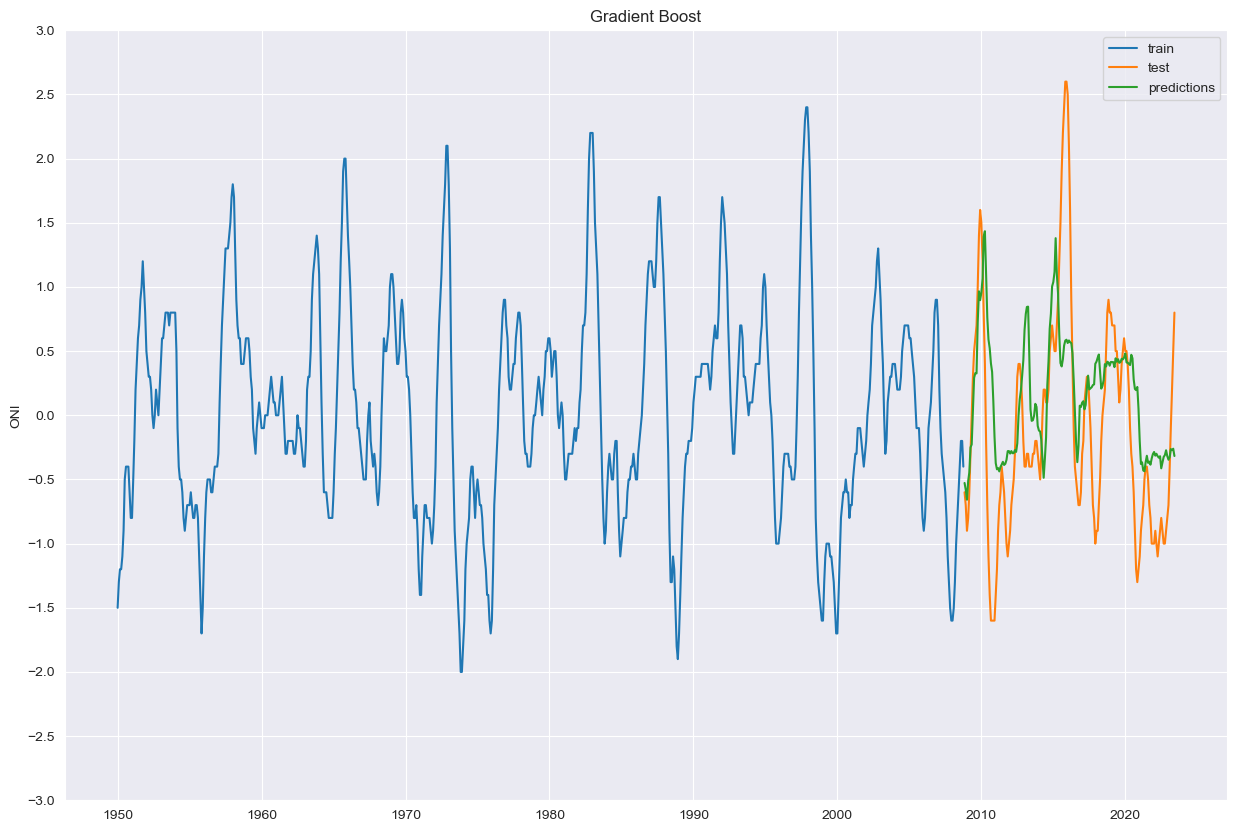

In [95]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train['oni'].index, train['oni'], label='train')
ax.plot(test['oni'].index, test['oni'], label='test')
ax.plot(test['oni'].index, y_pred, label='predictions')
ax.legend()
plt.ylabel('ONI')
ax.set_yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]) 
plt.title('Gradient Boost')
plt.show()

**Observation.**
* While hyperparameter tuning did increase the overall accuracy of the models and the RMSE are small in the absolute value sense, none of the models are particularly powerful in forecasting ONI values as shown in the graphs above. From the RMSE results we notice that all of them are about 0.6 and 0.7 but this is greater than the threshold used to determine if the ONI value is an anomaly. For this reason, we will try a different approach to forecast ENSO conditions.

### NN

In [96]:
import tensorflow as tf
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)
# Importing layers and model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
enso_nn = enso_oni['oni']
enso_nn = enso_oni['oni'].values
enso_nn = np.reshape(enso_nn, (882,1))

In [98]:
from sklearn.preprocessing import MinMaxScaler
# Normalize dataset
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(enso_nn)

In [99]:
# Splitting the data
test_size = int(len(dataset) * 0.3)
train = dataset[:-test_size]
test = dataset[-test_size:]

In [100]:
import sys
sys.path.append('../utils')
from my_utils import series_to_nn

In [101]:
step = 1
X_train, y_train = series_to_nn(train, step)
X_test, y_test = series_to_nn(test, step)

In [102]:
# reshape input
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [103]:
# create LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, step), return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(10, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 1, 30)             9720      
                                                                 
 lstm_2 (LSTM)               (None, 10)                1640      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 21771 (85.04 KB)
Trainable params: 21771 (85.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
# Fitting the model
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)

In [105]:
# Evaluate model
model.evaluate(X_test, y_test)

9/9 [==============================] - 3s 4ms/step - loss: 0.0022


0.002169416518881917

In [106]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [107]:
# Inverting arrays
y_train = scaler.inverse_transform([y_train])
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test = scaler.inverse_transform([y_test])
y_test_pred = scaler.inverse_transform(y_test_pred)

In [108]:
# RMSE
mse_test = mean_squared_error(y_test[0], y_test_pred[:,0], squared=False)
print('The root mean squared error for the test data is:', mse_test)

The root mean squared error for the test data is: 0.2142542006621327


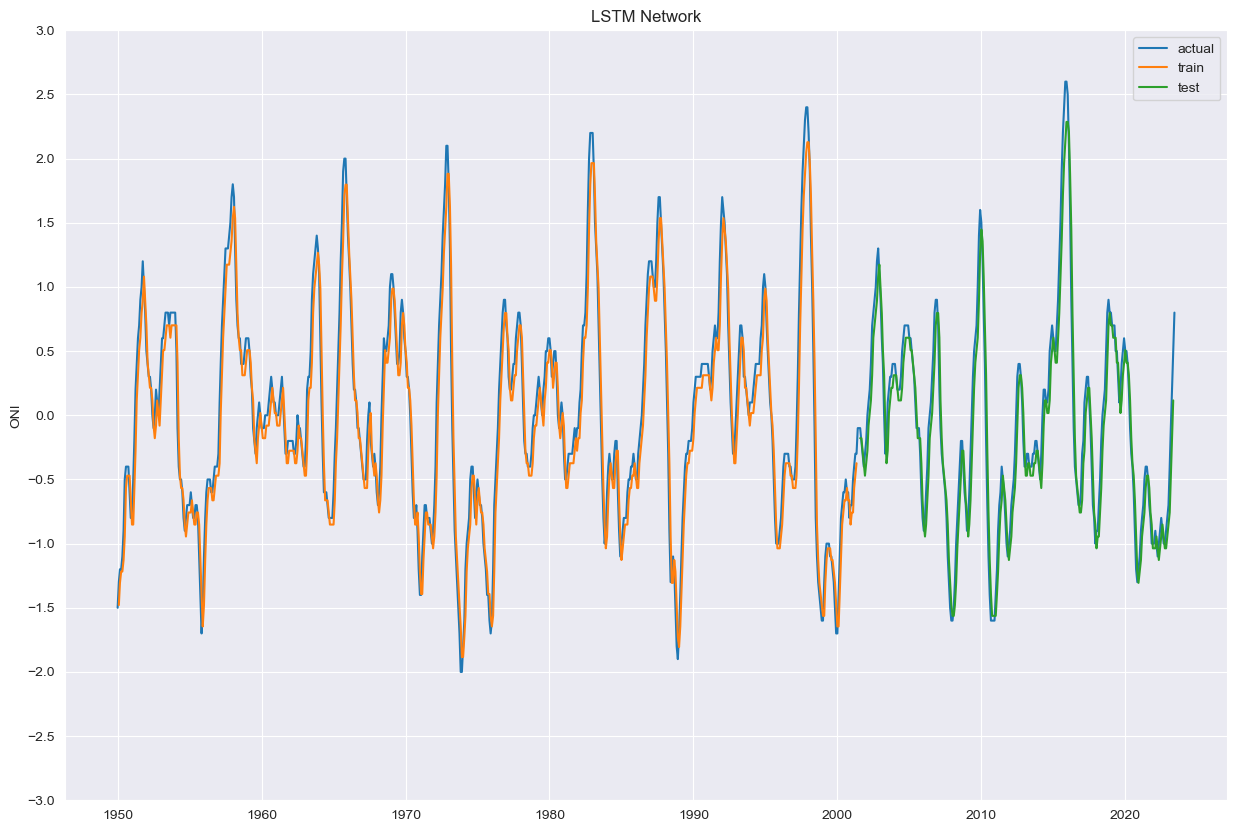

In [109]:
# Plotting our findings

# shift train predictions for plotting
train_plot = np.empty_like(dataset)
train_plot[:, :] = np.nan
train_plot[step:len(y_train_pred)+step, :] = y_train_pred

# shift test predictions for plotting
test_plot = np.empty_like(dataset)
test_plot[:, :] = np.nan
test_plot[len(y_train_pred)+(step*2)+1:len(dataset)-1, :] = y_test_pred

# Constucting DataFrame to plot
train_plot = np.reshape(train_plot, (882,))
test_plot = np.reshape(test_plot, (882,))
df_plot = enso_oni[['oni']]
df_plot['train'] = train_plot.tolist()
df_plot['test'] = test_plot.tolist()

# plot baseline and predictions
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_plot.index, df_plot['oni'], label='actual')
ax.plot(df_plot.index, df_plot['train'], label='train')
ax.plot(df_plot.index, df_plot['test'], label='test')
plt.ylabel('ONI')
ax.set_yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]) 
ax.legend()
plt.title('LSTM Network')
plt.show()

**Observation.**
* The RMSE of the neural network is approximately 67% better than that of the Ridge Regression, which was our best model previously. 
* As shown on the graph, the neural network is much better at predicting the values. 
* Neural networks have approximately better 67% RMSE values on the test set than Ridge Regression.

## Conclusions

Based on the analysis performed on the datasets, we can conclude the following:
* Sea Surface Temperature and Air Temperature are strongly correlated with each other. 
* Sea Surface Temperature and Air Temperature have increased over time, which may be an indication of global warming. 
* The Oceanic Niño Index and the Southern Oscillation Index have a strong negative correlation between them. This means that, according to the definition and use of the ONI values, negative SOI values are related to El Niño conditions while positive SOI values are related to La Niña conditions.
* Global Temperature Anomalies have increased over time which, once again, is an indication of global warming.
* There's no discernable trend in ONI values over time which confirms that ENSO is a periodical fluctuation.
* While ENSO and the Pacific-North American Pattern are independent climate effects, their metrics are weakly correlated, which means they may do appear to influence each other to some extent.
* The best model to predict ENSO anomalies is neural networks. For this reason, if we were to deploy a forecast model, this would be the approach to take. 